In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
column_names = ["Label","title","Text"]

df = pd.read_csv("train_amazon.csv", encoding='ISO-8859-1', names = column_names)


required_columns = ["Label","Text"]

df = df[required_columns]


# Selecting random 1000 rows because dataset is huge
df = df.sample(10000)


In [3]:
!pip install -U scikit-learn

  Using cached https://files.pythonhosted.org/packages/5f/08/c66e99f06fb73f727c870172f0962c103262ac68839cc05234709b7b45c2/scikit_learn-1.3.0-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/65/0d47953afa0ad569d12de5f65d964321c208492064c38fe3b0b9744f8d44/numpy-1.24.4-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/32/8e/7f403535ddf826348c9b8417791e28712019962f7e90ff845896d6325d09/scipy-1.10.1-cp38-cp38-win_amd64.whl


ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'c:\\program files\\python38\\Lib\\site-packages\\threadpoolctl.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
df.shape

(10000, 2)

In [5]:
import sklearn

In [6]:
df.head()

,Label,Text
3528218,1,I bought a factory refurbished Maxxum 3 and im...
3352652,1,Bought this printer today. I didn't buy it fro...
2332870,1,Like many who have expressed interest then dis...
954969,1,"actually, I also adore CW himself beyond all r..."
527551,1,This film was in Panavision. Where does Columb...


In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))



In [9]:
df.head()

,Label,Text
3528218,1,bought factory refurbished maxxum 3 immediatel...
3352652,1,"bought printer today. buy amazon, instead, wen..."
2332870,1,like many expressed interest disappointment se...
954969,1,"actually, also adore cw beyond reason. cd terr..."
527551,1,"film panavision. columbia get giving us ""pan s..."


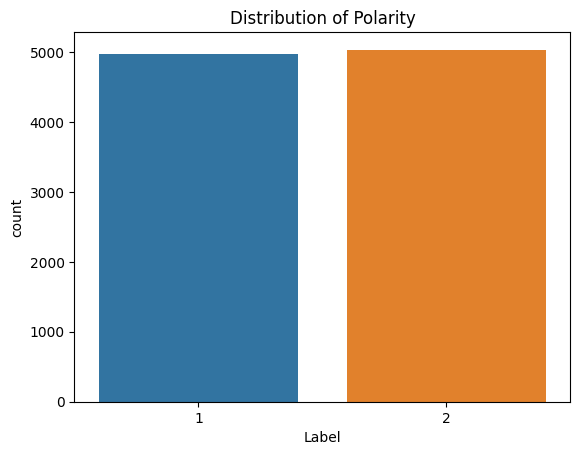

In [10]:
sns.countplot(x='Label', data=df)
plt.title('Distribution of Polarity')
plt.show()

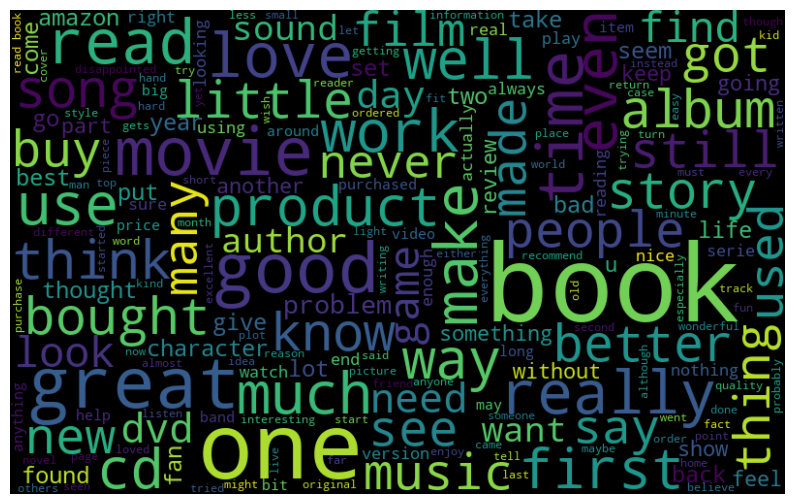

In [11]:
all_words = ' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Text'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

In [13]:
df.head()

,Label,Text,sentiment_score
3528218,1,bought factory refurbished maxxum 3 immediatel...,0.1260
3352652,1,"bought printer today. buy amazon, instead, wen...",0.9403
2332870,1,like many expressed interest disappointment se...,0.8655
954969,1,"actually, also adore cw beyond reason. cd terr...",0.9543
527551,1,"film panavision. columbia get giving us ""pan s...",0.3987


In [14]:
df['Label'].value_counts()

Label
2    5031
1    4969
Name: count, dtype: int64

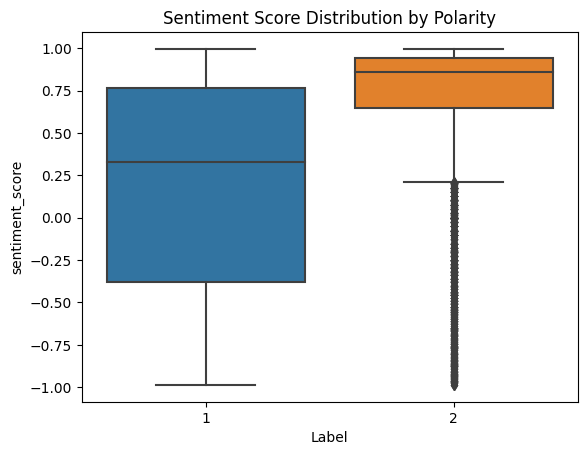

In [15]:
sns.boxplot(x='Label', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution by Polarity')
plt.show()

**Model**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [17]:
tfidf = TfidfVectorizer()
df_input = tfidf.fit_transform(df['Text'])
df_output = df['Label']

In [18]:
df_input.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
df_input_train, df_input_test, df_output_train, df_output_test = train_test_split(df_input, df_output, test_size = 0.2)

In [20]:
df_input_train

<8000x33088 sparse matrix of type '<class 'numpy.float64'>'
	with 277200 stored elements in Compressed Sparse Row format>

In [ ]:
model = RandomForestClassifier(n_estimators = 1000, random_state=42)
model.fit(df_input_train, df_output_train)

In [ ]:
predictions = model.predict(df_input_test)

In [ ]:
accuracy = accuracy_score(df_output_test, predictions)
print('Accuracy:', accuracy)

In [ ]:
cm = confusion_matrix(df_output_test, predictions)
sns.heatmap(cm)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y=df['Label'].value_counts()
keys=['0','4']
# Plotting data on chart
plt.pie(y, labels=keys, autopct='%f%%')

# Add title to the chart
plt.title('Polarity')

# Displaying chart
plt.show() 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the dot plot using stripplot
sns.stripplot(data=df, x="sentiment_score", jitter=True, color='black', size=5)

plt.xlabel('Sentiment Score')  # Set the label for the x-axis
plt.title('Sentiment Score Dot Plot')  # Set the title of the plot

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines to the x-axis

plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df'

# Get the value counts for the 'polarity' column
y = df['Label'].value_counts()
keys = ['1', '2']

# Create a dot plot
plt.figure(figsize=(6, 4))  # Set the figure size (optional)

plt.plot(keys, y, 'o', markersize=8, color='blue')  # 'o' for dot marker
plt.xlabel('Polarity')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.title('Polarity Dot Plot')  # Set the title of the plot

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to the y-axis

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the box plot
sns.boxplot(data=df, x="sentiment_score", color='lightblue')

plt.xlabel('Sentiment Score')  # Set the label for the x-axis
plt.title('Sentiment Score Box Plot')  # Set the title of the plot

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines to the x-axis

plt.show()


In [ ]:
sns.lmplot(x='Label', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution by Polarity')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the lmplot with only 'polarity' on the x-axis
sns.lmplot(x='Label', y='sentiment_score', data=df, col='Label', ci=None, scatter_kws={'s': 10})

plt.subplots_adjust(top=0.9)  # Adjust the top margin to make room for the title
plt.suptitle('Sentiment Score Distribution by Polarity', fontsize=16)  # Set the title for the whole plot

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the scatter plot using scatterplot
sns.scatterplot(data=df, x="sentiment_score", y="Label", color='blue', s=50)

plt.xlabel('Sentiment Score')  # Set the label for the x-axis
plt.ylabel('Polarity')  # Set the label for the y-axis
plt.title('Sentiment Score Scatter Plot')  # Set the title of the plot

plt.grid(axis='both', linestyle='--', alpha=0.7)  # Add grid lines to both axes

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the displot using displot
sns.displot(data=df, x="sentiment_score", kde=True, color='lightblue')

plt.xlabel('Sentiment Score')  # Set the label for the x-axis
plt.title('Sentiment Score Distribution')  # Set the title of the plot

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines to the x-axis

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the displot using displot
sns.displot(data=df, x="Label", kde=True, color='lightblue')

plt.xlabel('Sentiment Score')  # Set the label for the x-axis
plt.title('Sentiment Score Distribution')  # Set the title of the plot

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines to the x-axis

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the displot using displot with hue='polarity'
sns.displot(data=df, x="sentiment_score", kde=True, color='lightblue', hue="Label")

plt.xlabel('Sentiment Score')  # Set the label for the x-axis
plt.title('Sentiment Score Distribution by Polarity')  # Set the title of the plot

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines to the x-axis

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Create the PairGrid using displot with hue='polarity'
g = sns.PairGrid(data=df, x_vars="sentiment_score", y_vars="Label", hue="Label", height=4, aspect=1.4)

# Map the displot to each subplot of the PairGrid
g.map(sns.histplot, kde=True, color='lightblue')

# Set axis labels and title
g.axes[0, 0].set(xlabel="Sentiment Score", ylabel="Label")
g.fig.suptitle("Sentiment Score Distribution by Polarity", y=1.02)

# Add legend
g.add_legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the violin plot using violinplot
sns.violinplot(data=df, x="Label", y="sentiment_score", color='lightblue')

plt.xlabel('Polarity')  # Set the label for the x-axis
plt.ylabel('Sentiment Score')  # Set the label for the y-axis
plt.title('Sentiment Score Distribution')  # Set the title of the plot

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to the y-axis

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

# Convert 'polarity' to numerical using label encoding
df['polarity_numeric'] = df['Label'].map({'0': 0, '4': 1})

plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Calculate the correlation matrix
corr_matrix = df[['polarity_numeric', 'sentiment_score']].corr()

# Create the heatmap using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.xlabel('Sentiment Score')  # Set the label for the x-axis
plt.ylabel('Polarity')  # Set the label for the y-axis
plt.title('Correlation Heatmap')  # Set the title of the plot

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

# Get the value counts for the 'polarity' column
y = df['Label'].value_counts()
keys = ['0', '4']

# Create the swarm plot using swarmplot
plt.figure(figsize=(6, 4))  # Set the figure size (optional)

sns.swarmplot(x='Label', y='Label', data=df, color='blue', size=8)

plt.xlabel('Polarity')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.title('Polarity Swarm Plot')  # Set the title of the plot

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to the y-axis

plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

# Get the value counts for the 'polarity' column
y = df['Label'].value_counts()
keys = ['0', '4']

# Create the kdeplot using kdeplot
plt.figure(figsize=(6, 4))  # Set the figure size (optional)

sns.kdeplot(data=df, x='Label', fill=True, common_norm=False, palette='coolwarm')

plt.xlabel('Polarity')  # Set the label for the x-axis
plt.ylabel('Density')  # Set the label for the y-axis
plt.title('Polarity KDE Plot')  # Set the title of the plot

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to the y-axis

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

# Get the value counts for the 'polarity' column
y = df['Label'].value_counts()
keys = ['0', '4']

# Create the kdeplot using kdeplot
plt.figure(figsize=(6, 4))  # Set the figure size (optional)

sns.kdeplot(data=df, x='sentiment_score', fill=True, common_norm=False, palette='coolwarm')

plt.xlabel('sentiment_score')  # Set the label for the x-axis
plt.ylabel('Density')  # Set the label for the y-axis
plt.title('Polarity KDE Plot')  # Set the title of the plot

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to the y-axis

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the JointGrid using JointGrid
grid = sns.JointGrid(data=df, x="sentiment_score", y="Label")

# Plot the scatter plot on the joint grid
sns.scatterplot(data=df, x="sentiment_score", y="Label", color='blue', s=50, ax=grid.ax_joint)

# Plot the histograms on the marginal axes
sns.histplot(data=df, x="sentiment_score", color='blue', ax=grid.ax_marg_x)
sns.histplot(data=df, y="Label", color='blue', ax=grid.ax_marg_y, kde=True)

# Set axis labels and title
grid.set_axis_labels('Sentiment Score', 'Polarity')
grid.fig.suptitle('Sentiment Score Joint Plot', y=1.02)

# Add grid lines to both axes
grid.ax_joint.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the boxen plot using boxenplot
sns.boxenplot(data=df, y="sentiment_score", x="Label", color='blue')

plt.xlabel('Polarity')  # Set the label for the x-axis
plt.ylabel('Sentiment Score')  # Set the label for the y-axis
plt.title('Sentiment Score Boxen Plot')  # Set the title of the plot

plt.grid(axis='both', linestyle='--', alpha=0.7)  # Add grid lines to both axes

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

plt.figure(figsize=(8, 4))  # Set the figure size (optional)

# Create the strip plot using stripplot
sns.stripplot(data=df, y="sentiment_score", x="Label", color='blue', jitter=True, size=6)

plt.ylabel('Sentiment Score')  # Set the label for the x-axis
plt.xlabel('Polarity')  # Set the label for the y-axis
plt.title('Sentiment Score Strip Plot')  # Set the title of the plot

plt.grid(axis='both', linestyle='--', alpha=0.7)  # Add grid lines to both axes

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the necessary DataFrame 'df' and installed seaborn and matplotlib

# Create the FacetGrid using FacetGrid
g = sns.FacetGrid(data=df, col='Label', height=4, aspect=1.2)

# Create the histogram plot for 'sentiment_score' on each facet
g.map(sns.histplot, 'sentiment_score', color='blue', kde=True)

# Set axis labels and titles
g.set_axis_labels('Sentiment Score', 'Frequency')
g.set_titles('Polarity: {col_name}')

# Add grid lines to the plots
g.axes.flat[0].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated the confusion matrix 'cm' and loaded the necessary libraries

# Create the JointGrid using JointGrid
grid = sns.JointGrid(data=df, x="sentiment_score", y="Label")

# Plot the heatmap on the joint grid
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=grid.ax_joint)

# Set axis labels and title
grid.set_axis_labels('True Label', 'Predicted Label')
grid.fig.suptitle('Joint Grid', y=1.02)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated the confusion matrix 'cm' and loaded the necessary libraries

# Create the clustermap using clustermap
sns.clustermap(cm, annot=True, fmt='d', cmap='YlGnBu', figsize=(8, 6))

plt.title('Confusion Matrix Clustermap')
plt.show()


In [ ]:
# Assuming you have already loaded the necessary DataFrame 'df'

# Find the word with the greatest sentiment score
word_with_greatest_sentiment = df.loc[df['sentiment_score'].idxmax(), 'Text']

print(f"Sentence with greatest sentiment score: {word_with_greatest_sentiment}")


In [ ]:
### Practically Testing the Model on a completely new dataset

In [ ]:
test_df=pd.read_csv("test_amazon.csv", encoding='ISO-8859-1', names = column_names)
test_df=test_df.sample(100)

In [ ]:
test_df['Text'] = test_df['Text'].str.lower()
test_df['Text'] = test_df['Text'].str.replace('[^\w\s]','')
test_df['Text'] = test_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))

In [ ]:
test_df.head()

In [ ]:
test_df_input = tfidf.transform(test_df['Text'])
test_df_output = test_df['Label']

In [ ]:
test_df_input.shape

In [ ]:
test_predictions=model.predict(test_df_input)

In [ ]:
test_accuracy = accuracy_score(test_df_output, test_predictions)
print('Accuracy:', accuracy)